# Exploración de Datos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

data_dir = '../data/raw/'

In [2]:
# Cargar los datos
train = pd.read_csv(data_dir + 'train.csv')
client = pd.read_csv(data_dir + 'client.csv')
electricity_prices = pd.read_csv(data_dir + 'electricity_prices.csv')
forecast_weather = pd.read_csv(data_dir + 'forecast_weather.csv')
gas_prices = pd.read_csv(data_dir + 'gas_prices.csv')
historical_weather = pd.read_csv(data_dir + 'historical_weather.csv')
weather_station_to_county_mapping = pd.read_csv(data_dir + 'weather_station_to_county_mapping.csv')

In [3]:
# Revisar las primeras filas de cada dataframe
train_head = train.head()
gas_prices_head = gas_prices.head()
client_head = client.head()
electricity_prices_head = electricity_prices.head()
forecast_weather_head = forecast_weather.head()
historical_weather_head = historical_weather.head()

In [4]:
# Comprobar los tipos de datos y buscar valores nulos en cada conjunto de datos
train_info = train.info()
gas_prices_info = gas_prices.info()
client_info = client.info()
electricity_prices_info = electricity_prices.info()
forecast_weather_info = forecast_weather.info()
historical_weather_info = historical_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 138.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   forecast_date          637 non-null    object 
 1   lowest_price_per_mwh   637 non-null    float64
 2   highest_price_per_mwh  637 non-null    float64
 3   origin_date            637 non-null    object 
 4   data_block_id          637 non-null    i

In [5]:
# Verificar valores nulos
train_nulls = train.isnull().sum()
gas_prices_nulls = gas_prices.isnull().sum()
client_nulls = client.isnull().sum()
electricity_prices_nulls = electricity_prices.isnull().sum()
forecast_weather_nulls = forecast_weather.isnull().sum()
historical_weather_nulls = historical_weather.isnull().sum()


In [6]:
(train_head, gas_prices_head, client_head, electricity_prices_head, forecast_weather_head, historical_weather_head, 
 train_info, gas_prices_info, client_info, electricity_prices_info, forecast_weather_info, historical_weather_info,
 train_nulls, gas_prices_nulls, client_nulls, electricity_prices_nulls, forecast_weather_nulls, historical_weather_nulls)

(   county  is_business  product_type  target  is_consumption  \
 0       0            0             1   0.713               0   
 1       0            0             1  96.590               1   
 2       0            0             2   0.000               0   
 3       0            0             2  17.314               1   
 4       0            0             3   2.904               0   
 
               datetime  data_block_id  row_id  prediction_unit_id  
 0  2021-09-01 00:00:00              0       0                   0  
 1  2021-09-01 00:00:00              0       1                   0  
 2  2021-09-01 00:00:00              0       2                   1  
 3  2021-09-01 00:00:00              0       3                   1  
 4  2021-09-01 00:00:00              0       4                   2  ,
   forecast_date  lowest_price_per_mwh  highest_price_per_mwh origin_date  \
 0    2021-09-01                 45.23                  46.32  2021-08-31   
 1    2021-09-02                 45.62 

## 2. Análisis de variables numéricas y categóricas
 **Variables numéricas**: Realizar análisis descriptivo de las variables numéricas (media, mediana, desviación estándar, etc.).
 
 **Variables categóricas**: Calcular frecuencias y proporciones de las variables categóricas.


In [7]:
# Análisis de las variables numéricas en train.csv
train_numeric = train[['target']].describe()
print(train_numeric)

             target
count  2.017824e+06
mean   2.748556e+02
std    9.095024e+02
min    0.000000e+00
25%    3.780000e-01
50%    3.113300e+01
75%    1.802062e+02
max    1.548027e+04


In [8]:
# Análisis de las variables categóricas en train.csv
train_categorical = train[['county', 'is_business', 'product_type', 'is_consumption']].apply(pd.Series.value_counts)
print(train_categorical)

    county  is_business  product_type  is_consumption
0   212928     934848.0      170544.0       1009176.0
1    91872    1083504.0      781632.0       1009176.0
2   115200          NaN      147456.0             NaN
3   122496          NaN      918720.0             NaN
4   147264          NaN           NaN             NaN
5   151632          NaN           NaN             NaN
6    30624          NaN           NaN             NaN
7   173088          NaN           NaN             NaN
8    91872          NaN           NaN             NaN
9   122496          NaN           NaN             NaN
10  134640          NaN           NaN             NaN
11  198000          NaN           NaN             NaN
12   30624          NaN           NaN             NaN
13  121056          NaN           NaN             NaN
14  125808          NaN           NaN             NaN
15  148752          NaN           NaN             NaN


In [9]:
# Análisis de las variables numéricas en gas_prices.csv
gas_prices_numeric = gas_prices[['lowest_price_per_mwh', 'highest_price_per_mwh']].describe()
print(gas_prices_numeric)

       lowest_price_per_mwh  highest_price_per_mwh
count            637.000000             637.000000
mean              95.036750             107.754631
std               47.552295              54.743666
min               28.100000              34.000000
25%               60.000000              67.530000
50%               85.210000              93.470000
75%              109.000000             130.740000
max              250.000000             305.000000


In [10]:
# Análisis de las variables categóricas en client.csv
client_categorical = client[['product_type', 'county', 'is_business']].apply(pd.Series.value_counts)
print(client_categorical)

    product_type  county  is_business
0         3541.0    4422      19418.0
1        16232.0    1908      22501.0
2         3066.0    2392          NaN
3        19080.0    2544          NaN
4            NaN    3058          NaN
5            NaN    3149          NaN
6            NaN     636          NaN
7            NaN    3596          NaN
8            NaN    1908          NaN
9            NaN    2544          NaN
10           NaN    2797          NaN
11           NaN    4115          NaN
12           NaN     636          NaN
13           NaN    2514          NaN
14           NaN    2611          NaN
15           NaN    3089          NaN


In [11]:
# Análisis de las variables numéricas en electricity_prices.csv
electricity_prices_numeric = electricity_prices[['euros_per_mwh']].describe()
print(electricity_prices_numeric)

       euros_per_mwh
count   15286.000000
mean      157.064176
std       121.148625
min       -10.060000
25%        85.290000
50%       128.280000
75%       199.797500
max      4000.000000


In [12]:
# Análisis de las variables numéricas en forecast_weather.csv
forecast_weather_numeric = forecast_weather[['temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low', 'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component', '10_metre_v_wind_component', 'direct_solar_radiation', 'surface_solar_radiation_downwards', 'snowfall', 'total_precipitation']].describe()
print(forecast_weather_numeric)

        temperature      dewpoint  cloudcover_high  cloudcover_low  \
count  3.424512e+06  3.424512e+06     3.424512e+06    3.424512e+06   
mean   5.743913e+00  2.411946e+00     3.946654e-01    4.346453e-01   
std    7.844206e+00  7.121432e+00     4.440425e-01    4.386346e-01   
min   -2.749940e+01 -2.968357e+01     0.000000e+00    0.000000e+00   
25%    2.606445e-01 -2.364355e+00     0.000000e+00    3.356934e-04   
50%    4.872705e+00  1.835596e+00     8.866882e-02    2.305453e-01   
75%    1.114639e+01  7.302026e+00     9.784851e-01    9.994587e-01   
max    3.181069e+01  2.368057e+01     1.000008e+00    1.000008e+00   

       cloudcover_mid  cloudcover_total  10_metre_u_wind_component  \
count    3.424512e+06      3.424512e+06               3.424512e+06   
mean     3.590693e-01      6.819927e-01               1.255446e+00   
std      4.201556e-01      4.009629e-01               3.995300e+00   
min      0.000000e+00      0.000000e+00              -1.757718e+01   
25%      0.000000e+

In [13]:
# Análisis de las variables numéricas en historical_weather.csv
historical_weather_numeric = historical_weather[['temperature', 'dewpoint', 'rain', 'snowfall', 'surface_pressure', 'cloudcover_total', 'cloudcover_low', 'cloudcover_mid', 'cloudcover_high', 'windspeed_10m', 'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation', 'diffuse_radiation']].describe()
print(historical_weather_numeric)


        temperature      dewpoint          rain      snowfall  \
count  1.710802e+06  1.710802e+06  1.710802e+06  1.710802e+06   
mean   5.740968e+00  2.240312e+00  4.962012e-02  1.604896e-02   
std    8.025647e+00  7.224357e+00  2.079113e-01  7.462936e-02   
min   -2.370000e+01 -2.590000e+01  0.000000e+00  0.000000e+00   
25%    0.000000e+00 -2.600000e+00  0.000000e+00  0.000000e+00   
50%    5.100000e+00  1.700000e+00  0.000000e+00  0.000000e+00   
75%    1.120000e+01  7.200000e+00  0.000000e+00  0.000000e+00   
max    3.260000e+01  2.380000e+01  1.680000e+01  2.660000e+00   

       surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
count      1.710802e+06      1.710802e+06    1.710802e+06    1.710802e+06   
mean       1.009282e+03      6.091270e+01    4.668593e+01    3.440698e+01   
std        1.308891e+01      3.776905e+01    4.074760e+01    3.832769e+01   
min        9.429000e+02      0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.001500e+03      

### train.csv

**Distribución de las características categóricas: county**

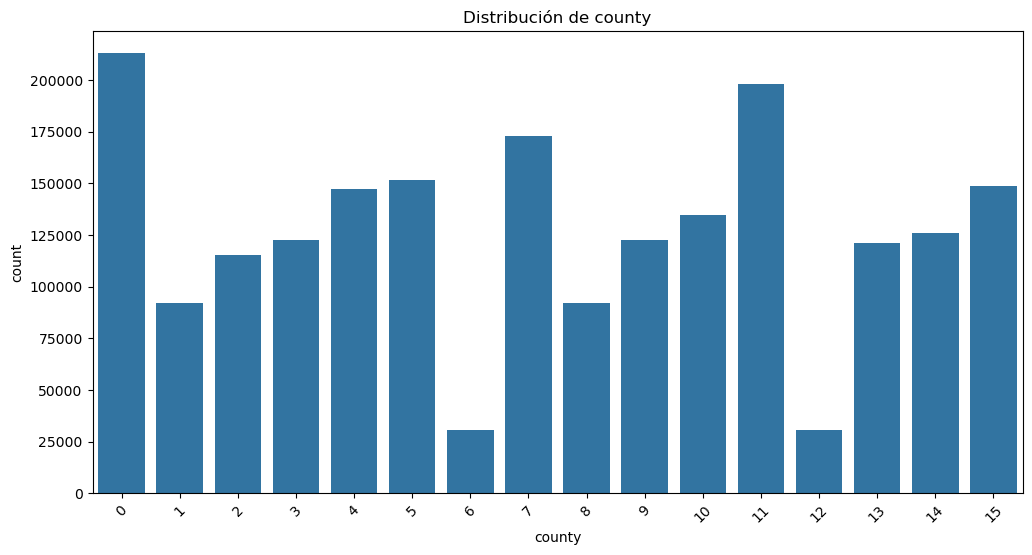

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='county')
plt.title('Distribución de county')
plt.xticks(rotation=45)
plt.show()


**Distribución de las características categóricas: is_bussiness**

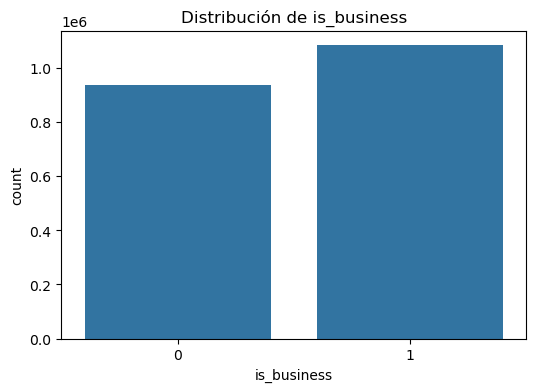

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='is_business')
plt.title('Distribución de is_business')
plt.show()

**Distribución de las características categóricas: product_type**

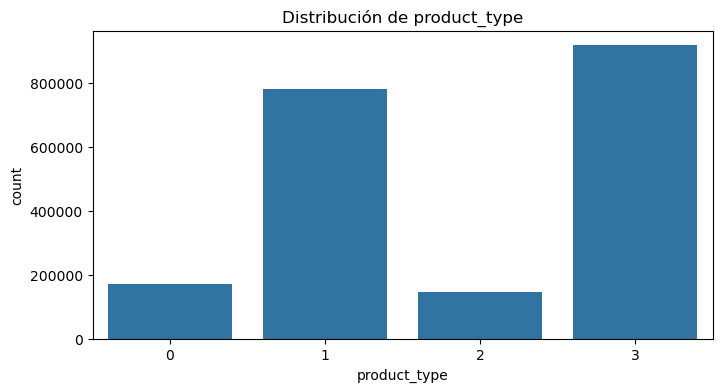

In [4]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train, x='product_type')
plt.title('Distribución de product_type')
plt.show()

**Distribución de los valores objetivo (target) para consumo y producción**

count    2.017824e+06
mean     2.748556e+02
std      9.095024e+02
min      0.000000e+00
25%      3.780000e-01
50%      3.113300e+01
75%      1.802062e+02
max      1.548027e+04
Name: target, dtype: float64


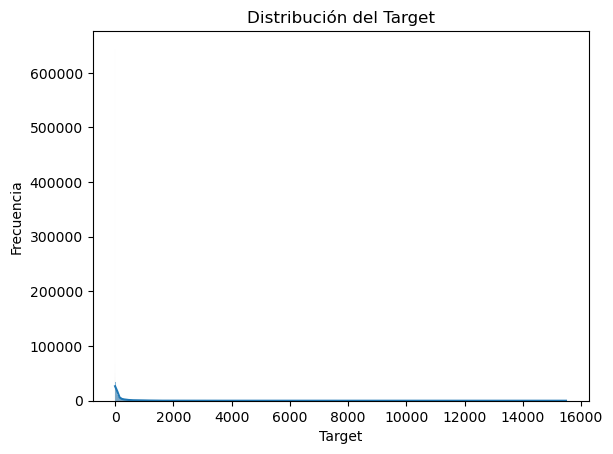

In [5]:
# Mostrar estadísticas descriptivas del target
print(train['target'].describe())

# Distribución del target
sns.histplot(train['target'], kde=True)
plt.title('Distribución del Target')
plt.xlabel('Target')
plt.ylabel('Frecuencia')
plt.show()


**Características de los Prosumidores:**

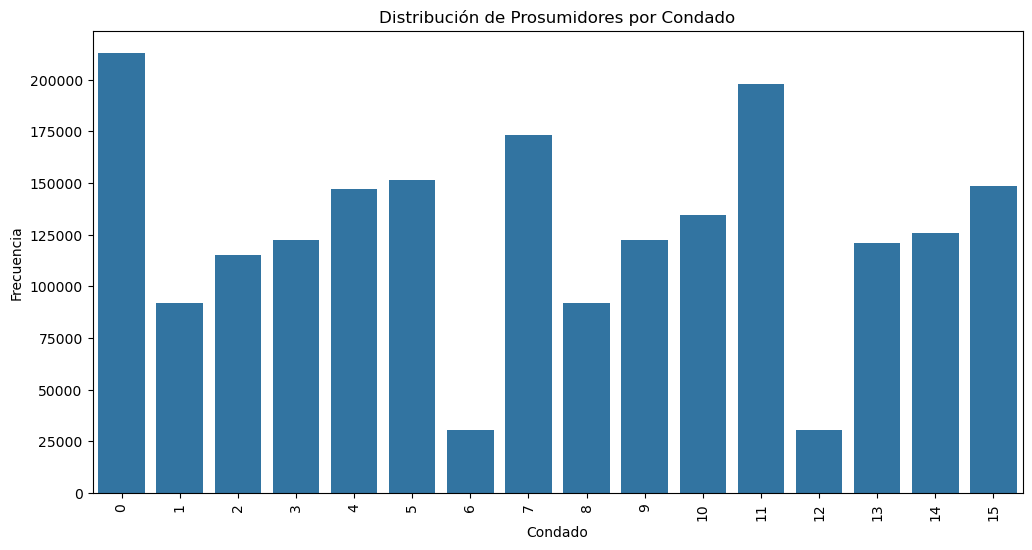

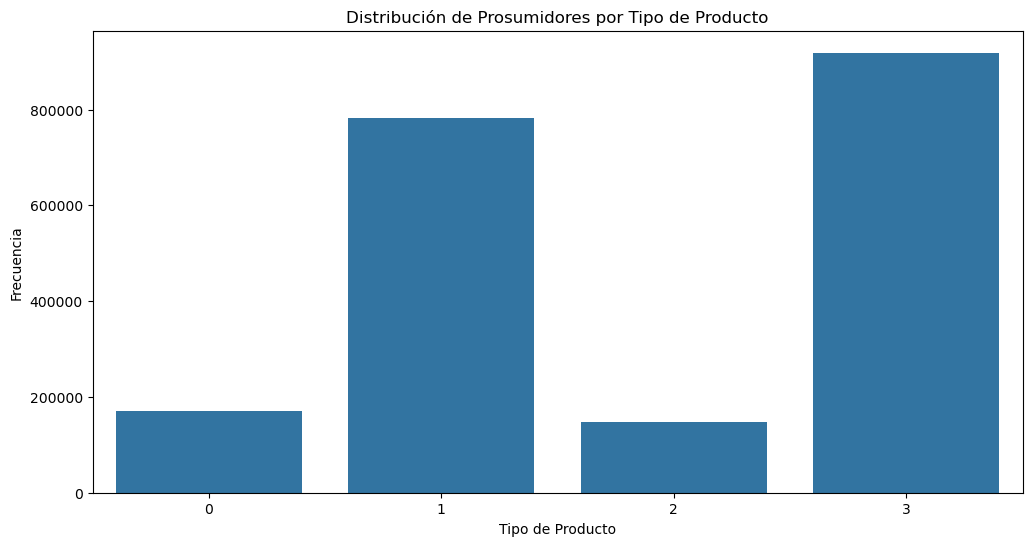

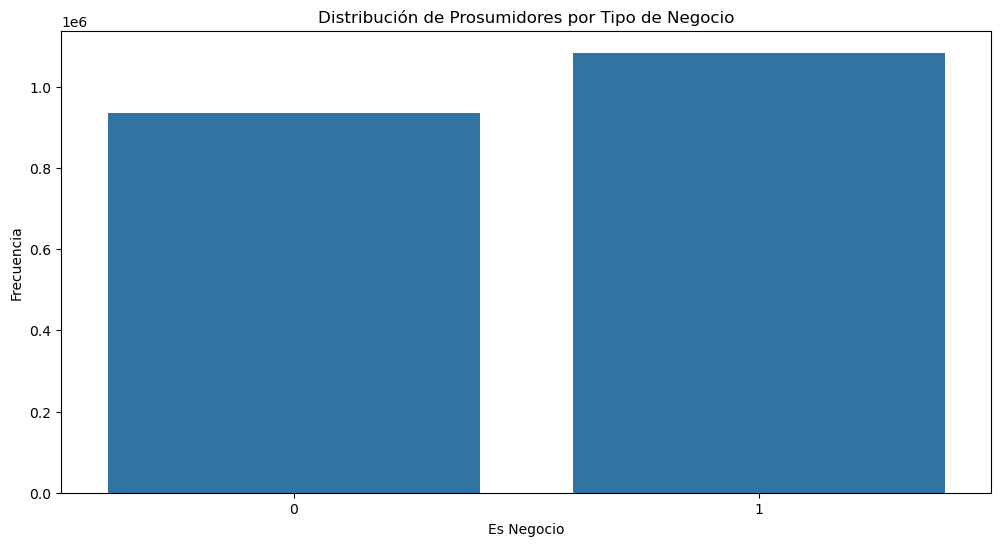

In [6]:
# Distribución de prosumidores por condado
plt.figure(figsize=(12, 6))
sns.countplot(x='county', data=train)
plt.title('Distribución de Prosumidores por Condado')
plt.xlabel('Condado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

# Distribución de prosumidores por tipo de producto
plt.figure(figsize=(12, 6))
sns.countplot(x='product_type', data=train)
plt.title('Distribución de Prosumidores por Tipo de Producto')
plt.xlabel('Tipo de Producto')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de prosumidores por tipo de negocio
plt.figure(figsize=(12, 6))
sns.countplot(x='is_business', data=train)
plt.title('Distribución de Prosumidores por Tipo de Negocio')
plt.xlabel('Es Negocio')
plt.ylabel('Frecuencia')
plt.show()


##  3. Análisis Temporal
**Patrones Diarios y Estacionales:**

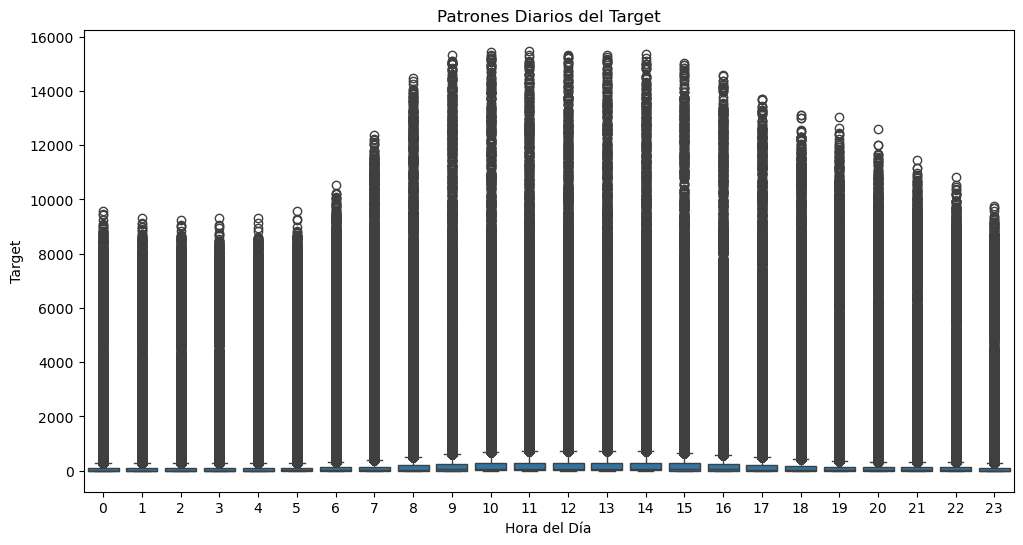

In [3]:
# Convertir datetime a tipo datetime
train['datetime'] = pd.to_datetime(train['datetime'])

# Extraer características temporales
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train['month'] = train['datetime'].dt.month

# Patrones diarios
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='target', data=train)
plt.title('Patrones Diarios del Target')
plt.xlabel('Hora del Día')
plt.ylabel('Target')
plt.show()


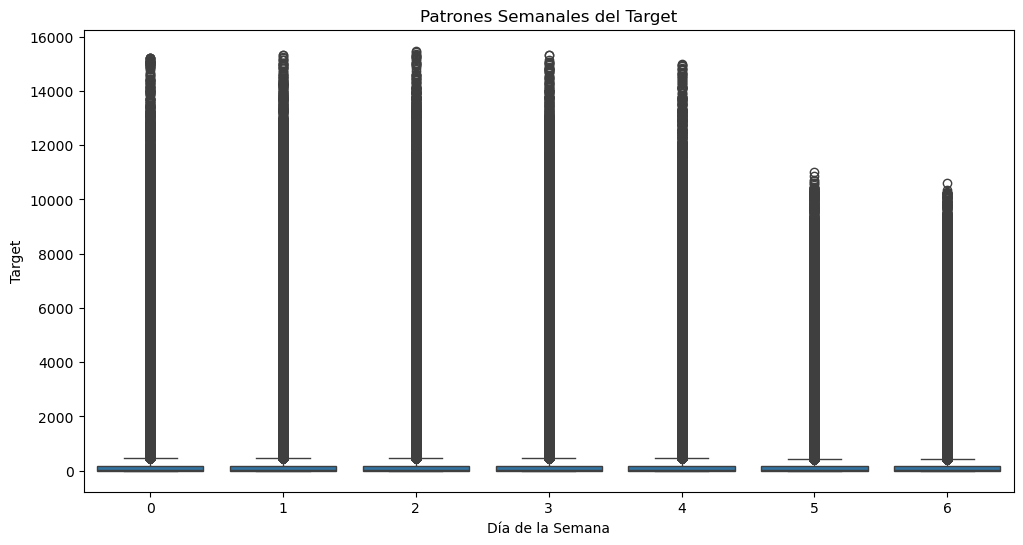

In [6]:
# Patrones semanales
plt.figure(figsize=(12, 6))
sns.boxplot(x='dayofweek', y='target', data=train)
plt.title('Patrones Semanales del Target')
plt.xlabel('Día de la Semana')
plt.ylabel('Target')
plt.show()

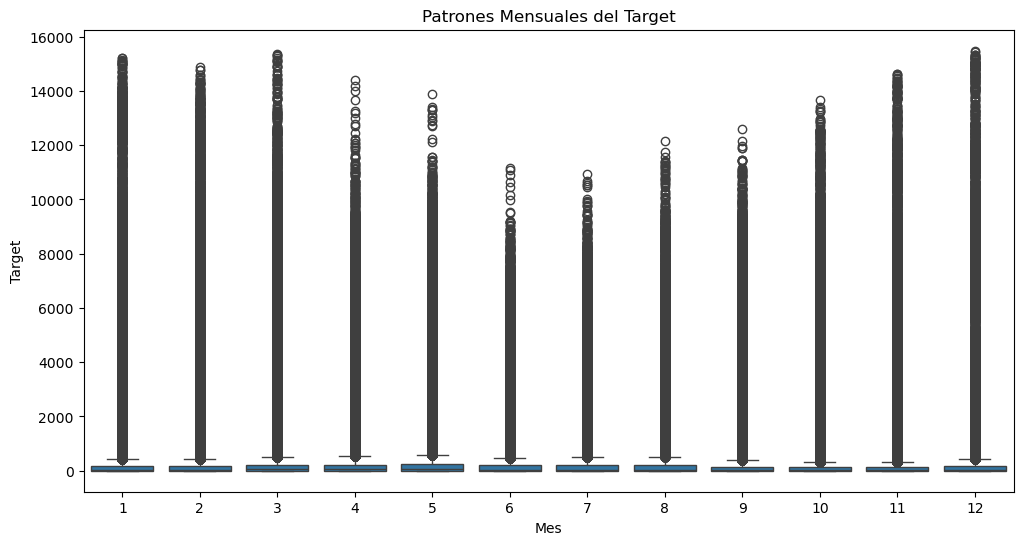

In [7]:
# Patrones mensuales
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='target', data=train)
plt.title('Patrones Mensuales del Target')
plt.xlabel('Mes')
plt.ylabel('Target')
plt.show()

In [4]:
# Unir datos meteorológicos y train
weather_features = ['temperature', 'cloudcover_total', 'windspeed_10m', 'direct_solar_radiation']
historical_weather['datetime'] = pd.to_datetime(historical_weather['datetime'])
merged_weather = pd.merge(train, historical_weather[['datetime'] + weather_features], on='datetime', how='left')

: 

## 5. Análisis de consumo vs producción

In [12]:
# Convertir a tipo datetime
train['datetime'] = pd.to_datetime(train['datetime'])

# Filtrar solo las filas de consumo
consumption_data = train[train['is_consumption'] == 1]

# Resumir datos de consumo por día
dailyCons = consumption_data.resample('D', on='datetime').sum()

# Calcular el consumo promedio diario
meanConsumption = dailyCons['target'].mean()

# Crear la gráfica de área
fig = go.Figure()

# Añadir la traza de área para el consumo diario
fig.add_trace(go.Scatter(
    x=dailyCons.index, y=dailyCons['target'],
    fill='tozeroy',
    mode='none',  # Ocultar las líneas
    name='Daily Consumption',
    fillcolor='rgba(250, 22, 63, 0.6)'  # Color del área con transparencia
))

# Añadir la línea horizontal indicando el consumo promedio
fig.add_hline(y=meanConsumption, line_dash="dot",
              annotation_text="Average Consumption",
              annotation_position="bottom right",
              line=dict(color='blue', width=2))

# Personalizar la apariencia de la gráfica
fig.update_layout(
    title='1. Análisis Diario de Consumo',
    xaxis_title='Date',
    yaxis_title='Consumption',
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    yaxis=dict(
        gridcolor='lightgrey'  # Color de las líneas de la cuadrícula
    ),
    xaxis=dict(
        gridcolor='lightgrey'  # Color de las líneas de la cuadrícula
    )
)

# Mostrar la gráfica
fig.show()

In [8]:
# Filtrar solo las filas de producción
production_data = train[train['is_consumption'] == 0]

# Resumir datos de producción por día
dailyProd = production_data.resample('D', on='datetime').sum()

# Calcular la producción promedio diaria
meanProduction = dailyProd['target'].mean()

# Crear la gráfica de área
fig = go.Figure()

# Añadir la traza de área para la producción diaria
fig.add_trace(go.Scatter(
    x=dailyProd.index, y=dailyProd['target'],
    fill='tozeroy',
    mode='none',  # Ocultar las líneas
    name='Daily Production',
    fillcolor='rgba(66, 125, 157, 0.6)'  # Color del área con transparencia
))

# Añadir la línea horizontal indicando la producción promedio
fig.add_hline(y=meanProduction, line_dash="dot",
              annotation_text="Average Production",
              annotation_position="bottom right",
              line=dict(color='red', width=2))

# Personalizar la apariencia de la gráfica
fig.update_layout(
    title='2. Análisis Diario de Producción',
    xaxis_title='Date',
    yaxis_title='Production',
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    yaxis=dict(
        gridcolor='lightgrey'  # Color de las líneas de la cuadrícula
    ),
    xaxis=dict(
        gridcolor='lightgrey'  # Color de las líneas de la cuadrícula
    )
)

# Mostrar la gráfica
fig.show()

In [9]:
# Calcular el consumo neto diario
dailyNetConsumption = dailyCons['target'] - dailyProd['target']

# Calcular el promedio de consumo neto diario
meanNetConsumption = dailyNetConsumption.mean()

# Crear la gráfica
fig = go.Figure()

# Añadir la traza de área para el consumo neto diario
fig.add_trace(go.Scatter(
    x=dailyNetConsumption.index, y=dailyNetConsumption,
    mode='lines',
    name='Daily Net Consumption',
    line=dict(color='green', width=2)
))

# Añadir línea horizontal indicando el consumo neto promedio
fig.add_hline(y=meanNetConsumption, line_dash="dot",
              annotation_text="Average Net Consumption",
              annotation_position="bottom right",
              line=dict(color='orange', width=2))

# Personalizar la apariencia de la gráfica
fig.update_layout(
    title='Análisis del consumo Neto Diario',
    xaxis_title='Date',
    yaxis_title='Net Consumption',
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    yaxis=dict(
        gridcolor='lightgrey'  # Color de las líneas de la cuadrícula
    ),
    xaxis=dict(
        gridcolor='lightgrey'  # Color de las líneas de la cuadrícula
    )
)

# Mostrar la gráfica
fig.show()

In [11]:
# Histograma de producción diaria
fig_hist_prod = px.histogram(dailyProd, x='target', nbins=50, title='Distribution of Daily Production')
fig_hist_prod.update_layout(xaxis_title='Production',
                            yaxis_title='Count')

# Histograma de consumo diario
fig_hist_cons = px.histogram(dailyCons, x='target', nbins=50, title='Distribution of Daily Consumption')
fig_hist_cons.update_layout(xaxis_title='Consumption',
                            yaxis_title='Count')

# Mostrar los histogramas
fig_hist_prod.show()
fig_hist_cons.show()

## Análisis del precio del gas

**gas_prices.csv**

***origin_date*** - La fecha en que estuvieron disponibles los precios diarios.

***forecast_date*** - La fecha en que los precios previstos deberán ser relevantes.

***[lowest/highest]_price_per_mwh*** - El precio más bajo/más alto del gas natural vigente en el mercado del día siguiente de esa jornada de negociación, en euros por megavatio hora equivalente.

***data_block_id***


In [32]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [33]:
gas_prices = pd.read_csv(data_dir + 'gas_prices.csv')
print(gas_prices.info())
print(gas_prices.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   forecast_date          637 non-null    object 
 1   lowest_price_per_mwh   637 non-null    float64
 2   highest_price_per_mwh  637 non-null    float64
 3   origin_date            637 non-null    object 
 4   data_block_id          637 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 25.0+ KB
None
  forecast_date  lowest_price_per_mwh  highest_price_per_mwh origin_date  \
0    2021-09-01                 45.23                  46.32  2021-08-31   
1    2021-09-02                 45.62                  46.29  2021-09-01   
2    2021-09-03                 45.85                  46.40  2021-09-02   
3    2021-09-04                 46.30                  46.80  2021-09-03   
4    2021-09-05                 46.30                  46.58  2021-09-04   

   data

In [34]:
print(gas_prices.describe())
# Convertir la columna 'forecast_date' y 'origin_date' a formato de fecha
gas_prices['forecast_date'] = pd.to_datetime(gas_prices['forecast_date'])
gas_prices['origin_date'] = pd.to_datetime(gas_prices['origin_date'])


       lowest_price_per_mwh  highest_price_per_mwh  data_block_id
count            637.000000             637.000000     637.000000
mean              95.036750             107.754631     319.000000
std               47.552295              54.743666     184.030342
min               28.100000              34.000000       1.000000
25%               60.000000              67.530000     160.000000
50%               85.210000              93.470000     319.000000
75%              109.000000             130.740000     478.000000
max              250.000000             305.000000     637.000000


             forecast_date  lowest_price_per_mwh  highest_price_per_mwh  \
count                  637            637.000000             637.000000   
mean   2022-07-16 00:00:00             95.036750             107.754631   
min    2021-09-01 00:00:00             28.100000              34.000000   
25%    2022-02-07 00:00:00             60.000000              67.530000   
50%    2022-07-16 00:00:00             85.210000              93.470000   
75%    2022-12-22 00:00:00            109.000000             130.740000   
max    2023-05-30 00:00:00            250.000000             305.000000   
std                    NaN             47.552295              54.743666   

               origin_date  data_block_id  
count                  637     637.000000  
mean   2022-07-15 00:00:00     319.000000  
min    2021-08-31 00:00:00       1.000000  
25%    2022-02-06 00:00:00     160.000000  
50%    2022-07-15 00:00:00     319.000000  
75%    2022-12-21 00:00:00     478.000000  
max    2023-05-2

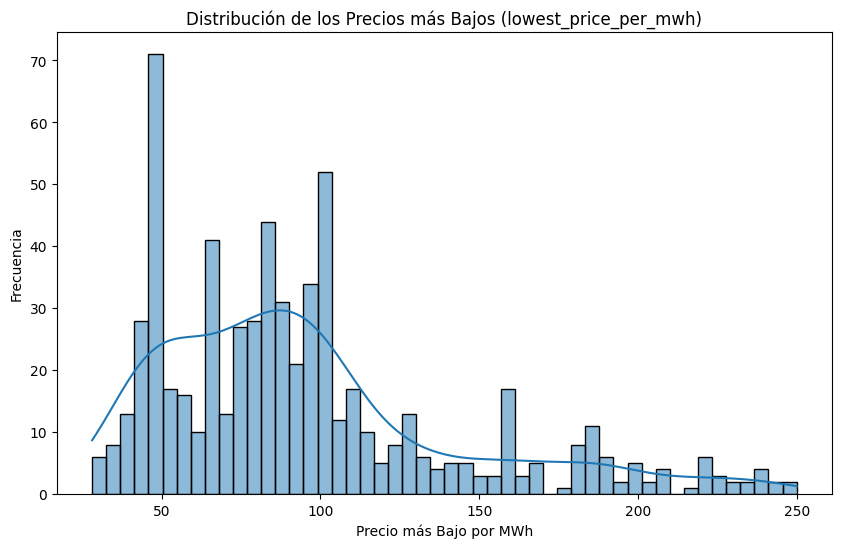

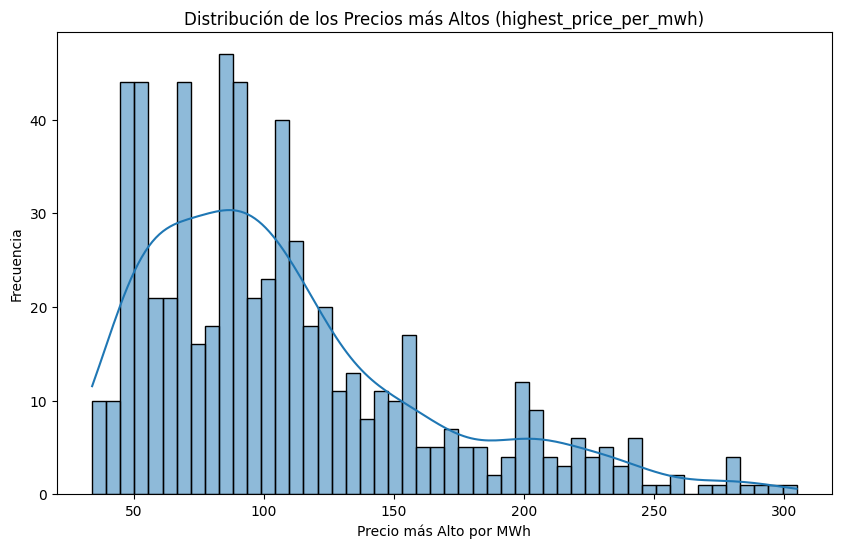

In [35]:
# Estadísticas descriptivas
print(gas_prices.describe())

# Distribución de los precios más bajos
plt.figure(figsize=(10, 6))
sns.histplot(gas_prices['lowest_price_per_mwh'], bins=50, kde=True)
plt.title('Distribución de los Precios más Bajos (lowest_price_per_mwh)')
plt.xlabel('Precio más Bajo por MWh')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de los precios más altos
plt.figure(figsize=(10, 6))
sns.histplot(gas_prices['highest_price_per_mwh'], bins=50, kde=True)
plt.title('Distribución de los Precios más Altos (highest_price_per_mwh)')
plt.xlabel('Precio más Alto por MWh')
plt.ylabel('Frecuencia')
plt.show()


<Figure size 1500x800 with 0 Axes>

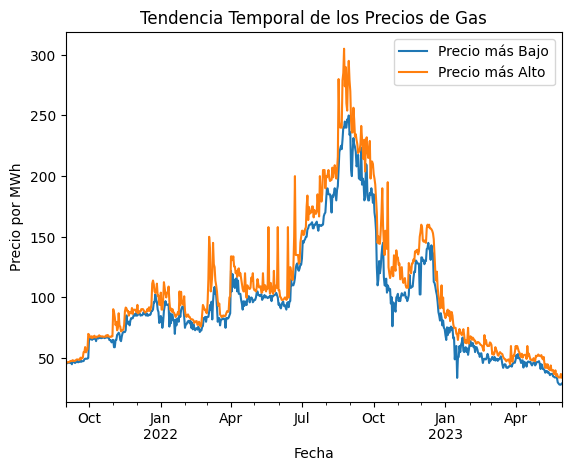

In [36]:
# Visualizar la tendencia temporal de los precios más bajos y más altos
plt.figure(figsize=(15, 8))
gas_prices.set_index('forecast_date')[['lowest_price_per_mwh', 'highest_price_per_mwh']].plot()
plt.title('Tendencia Temporal de los Precios de Gas')
plt.xlabel('Fecha')
plt.ylabel('Precio por MWh')
plt.legend(['Precio más Bajo', 'Precio más Alto'])
plt.show()

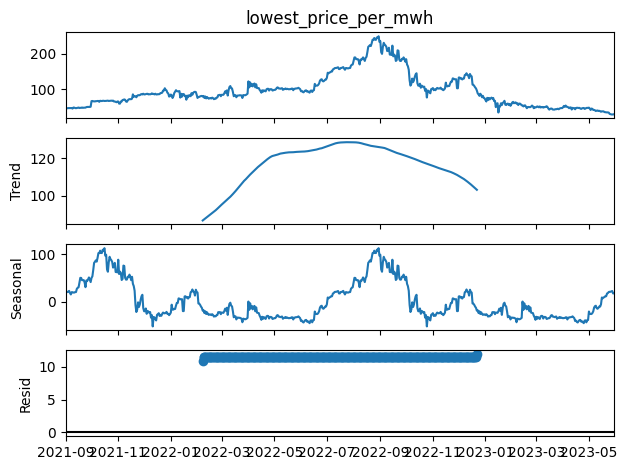

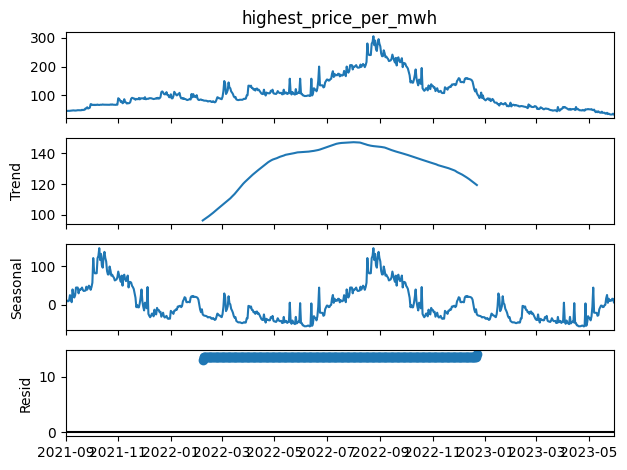

In [39]:
result_low = seasonal_decompose(gas_prices.set_index('forecast_date')['lowest_price_per_mwh'], model='additive', period=318)
result_low.plot()
plt.show()

result_high = seasonal_decompose(gas_prices.set_index('forecast_date')['highest_price_per_mwh'], model='additive', period=318)
result_high.plot()
plt.show()

## historical_weather.csv

datetime- Esto representa el inicio del período de 1 hora para el cual se miden los datos meteorológicos.

temperature- Medido al final del período de 1 hora.

dewpoint- Medido al final del período de 1 hora.

rain- Diferente de las convenciones de pronóstico. La lluvia de los sistemas climáticos a gran escala de la hora en milímetros.

snowfall- Diferente de las convenciones de pronóstico. Nevadas durante la hora en centímetros.

surface_pressure- La presión del aire en la superficie en hectopascales.

cloudcover_[low/mid/high/total]- Diferente de las convenciones de pronóstico. Cubierta de nubes a 0-3 km, 3-8, 8 + y total.

windspeed_10m- Diferente de las convenciones de pronóstico. La velocidad del viento a 10 metros sobre el suelo en metros por segundo.

winddirection_10m- Diferente de las convenciones de pronóstico. La dirección del viento a 10 metros sobre el suelo en grados.

shortwave_radiation- Diferente de las convenciones de pronóstico. La irradiación horizontal global en vatios-hora por metro cuadrado.

***direct_solar_radiation***
diffuse_radiation- Diferente de las convenciones de pronóstico. La irradiación solar difusa en vatios-hora por metro cuadrado.
[latitude/longitude]- Las coordenadas de la estación meteorológica.
data_block_id

In [44]:
historical_weather = pd.read_csv(data_dir + 'historical_weather.csv')
print(historical_weather.info())
print(historical_weather.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710802 entries, 0 to 1710801
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   datetime                object 
 1   temperature             float64
 2   dewpoint                float64
 3   rain                    float64
 4   snowfall                float64
 5   surface_pressure        float64
 6   cloudcover_total        int64  
 7   cloudcover_low          int64  
 8   cloudcover_mid          int64  
 9   cloudcover_high         int64  
 10  windspeed_10m           float64
 11  winddirection_10m       int64  
 12  shortwave_radiation     float64
 13  direct_solar_radiation  float64
 14  diffuse_radiation       float64
 15  latitude                float64
 16  longitude               float64
 17  data_block_id           float64
dtypes: float64(12), int64(5), object(1)
memory usage: 234.9+ MB
None
              datetime  temperature  dewpoint  rain  snowfall  \
0  2021-09-0

In [45]:
print(historical_weather.describe())

        temperature      dewpoint          rain      snowfall  \
count  1.710802e+06  1.710802e+06  1.710802e+06  1.710802e+06   
mean   5.740968e+00  2.240312e+00  4.962012e-02  1.604896e-02   
std    8.025647e+00  7.224357e+00  2.079113e-01  7.462936e-02   
min   -2.370000e+01 -2.590000e+01  0.000000e+00  0.000000e+00   
25%    0.000000e+00 -2.600000e+00  0.000000e+00  0.000000e+00   
50%    5.100000e+00  1.700000e+00  0.000000e+00  0.000000e+00   
75%    1.120000e+01  7.200000e+00  0.000000e+00  0.000000e+00   
max    3.260000e+01  2.380000e+01  1.680000e+01  2.660000e+00   

       surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
count      1.710802e+06      1.710802e+06    1.710802e+06    1.710802e+06   
mean       1.009282e+03      6.091270e+01    4.668593e+01    3.440698e+01   
std        1.308891e+01      3.776905e+01    4.074760e+01    3.832769e+01   
min        9.429000e+02      0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.001500e+03      

## Unir archivos .csv horizontalmente

In [4]:
import pandas as pd

In [7]:
merged_df = train_df.merge(client_df, on=['county', 'is_business', 'product_type', 'data_block_id'], how='left')


             county   is_business  product_type        target  is_consumption  \
count  2.018352e+06  2.018352e+06  2.018352e+06  2.017824e+06       2018352.0   
mean   7.297034e+00  5.368261e-01  1.898927e+00  2.748556e+02             0.5   
std    4.780990e+00  4.986421e-01  1.081766e+00  9.095024e+02             0.5   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00             0.0   
25%    3.000000e+00  0.000000e+00  1.000000e+00  3.780000e-01             0.0   
50%    7.000000e+00  1.000000e+00  2.000000e+00  3.113300e+01             0.5   
75%    1.100000e+01  1.000000e+00  3.000000e+00  1.802062e+02             1.0   
max    1.500000e+01  1.000000e+00  3.000000e+00  1.548027e+04             1.0   

       data_block_id        row_id  prediction_unit_id  
count   2.018352e+06  2.018352e+06        2.018352e+06  
mean    3.218746e+02  1.009176e+06        3.304538e+01  
std     1.826343e+02  5.826482e+05        1.959059e+01  
min     0.000000e+00  0.000000e+00        

## Cálculo de correlaciones

Vamos a calcular las correlaciones entre las variables relevantes, como la producción/consumo de energía y los precios de la electricidad o gas

In [41]:
# Cargar datos de precios de electricidad y gas
electricity_prices = pd.read_csv(data_dir + 'electricity_prices.csv')
gas_prices = pd.read_csv(data_dir + 'gas_prices.csv')

In [42]:
# Convertir forecast_date a tipo datetime si es necesario
electricity_prices['forecast_date'] = pd.to_datetime(electricity_prices['forecast_date'])
gas_prices['forecast_date'] = pd.to_datetime(gas_prices['forecast_date'])

In [43]:
# Convertir forecast_date a tipo datetime si es necesario
electricity_prices['forecast_date'] = pd.to_datetime(electricity_prices['forecast_date'])
gas_prices['forecast_date'] = pd.to_datetime(gas_prices['forecast_date'])

# Convertir forecast_date a tipo datetime si es necesario
electricity_prices['forecast_date'] = pd.to_datetime(electricity_prices['forecast_date'])

# Unir datos de producción y consumo con los precios correspondientes
daily_data = pd.merge(dailyProd, dailyCons, on='datetime', suffixes=('_prod', '_cons'))

# Verifica las columnas disponibles en daily_data después de la primera fusión
print(daily_data.columns)

# Realizar la fusión con electricity_prices
daily_data = pd.merge(daily_data, electricity_prices[['forecast_date', 'euros_per_mwh']], left_on='datetime', right_on='forecast_date', how='left')

# Realizar la fusión con gas_prices
daily_data = pd.merge(daily_data, gas_prices[['forecast_date', 'lowest_price_per_mwh', 'highest_price_per_mwh']], left_on='datetime', right_on='forecast_date', how='left')

# Calcular matriz de correlación
correlation_matrix = daily_data[['target_prod', 'target_cons', 'euros_per_mwh', 'lowest_price_per_mwh', 'highest_price_per_mwh']].corr()

# Mostrar matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

Index(['county_prod', 'is_business_prod', 'product_type_prod', 'target_prod',
       'is_consumption_prod', 'data_block_id_prod', 'row_id_prod',
       'prediction_unit_id_prod', 'county_cons', 'is_business_cons',
       'product_type_cons', 'target_cons', 'is_consumption_cons',
       'data_block_id_cons', 'row_id_cons', 'prediction_unit_id_cons'],
      dtype='object')


KeyError: 'datetime'